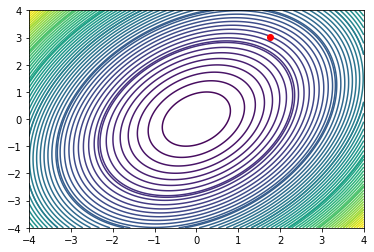

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return ((x[0]**2)/2)+((x[1]**2)/3)-((x[0]*x[1])/4)

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()

In [61]:
# variable stepwidth
def derivative2(f, xy, d=0.001):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize_fix(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    converged = False
    x_hist = []
    x_hist.append(x_now)
    dx = 0.05

    for i in range(N):
        
        df_now = derivative2(f, x_now) 
        x_next = x_now - df_now*dx
        
        #print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

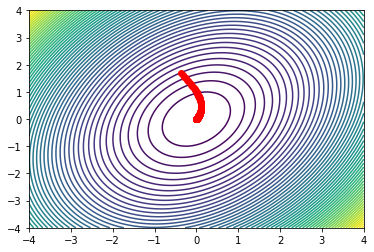

results of f_min:  1.6041802777386505e-24   number of iterations:   1001
[-0.36178191  1.68162735] 1.1601621759091811
[1.15782229e-12 2.16341074e-12] 1.6041802777386505e-24


In [65]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_fix(f1, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f1(x_hist[0]))
print(x_hist[-1], f1(x_hist[-1]))

In [74]:
from scipy.optimize import minimize

[x0, y0] = init(x_min, x_max, y_min, y_max)
res = minimize(f1, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 81
